## Task 1: Backpropagation Implementation for Binary Classification 

### 1) Dataset Creation

* Generate a synthetic dataset for binary classification using the make_blobs
function from the scikit-learn library.
* The dataset should have 1000 samples, 2 features, and their respective binary
labels.
* Split the dataset into train and test sets.
* Plot the training data using matplotlib.

In [88]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np

In [89]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Reshape y_train and y_test to have shape (800, 1) and (200, 1)
y_train = y_train.reshape(-1, 1) #To make (800,) to (800,1)
y_test = y_test.reshape(-1, 1)

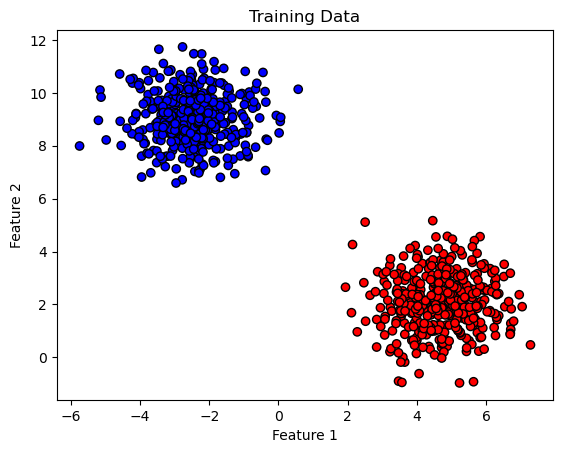

In [90]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolors='k', marker='o')
plt.title("Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### 2) Implement Backpropagation

* Create a small neural network from scratch with the following specifications:
    * Input layer with 2 neurons.
    * One hidden layer with 4 neurons using the sigmoid activation function.
    * Output layer with 1 neuron using the sigmoid activation function.
* Implement forward and backward propagation manually to train the network.
* Update the weights using gradient descent.
* Evaluate the model on the test set and print its accuracy

In [91]:
input_size = 2  # Number of input features
hidden_size = 4  # Number of neurons in the hidden layer
output_size = 1

In [92]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error loss function
def mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

In [93]:
np.random.seed(1)
w_i_h = np.random.randn(2, 4)  # generates a matrix of random values with dimensions (2, 4)
b_h = np.zeros((1, 4))  # Bias for hidden layer
w_h_o = np.random.randn(4, 1)  # Weights from hidden to output layer
b_o = np.zeros((1, 1))

learning_rate = 0.1
epochs = 10000


In [94]:
def forward(X):
    z1 = np.dot(X, w_i_h) + b_h
    output_h = sigmoid(z1)

    # Output layer
    z2 = np.dot(output_h, w_h_o) + b_o
    #print("Shape z2",z2.shape)
    output_o = sigmoid(z2)
    #print("Shape Out_o",output_o.shape)
    return output_h,output_o

In [95]:
def backward(X, y, output_h, output_o, learning_rate):

       # Backward propagation (gradient descent)
    # Output layer
    #print("y train shape", y_train.shape)
    error = y - output_o  # Compute the error (loss)

    #print("Error", error.shape)
    d_output_o = error * sigmoid_derivative(output_o)
    global w_h_o, b_o, w_i_h, b_h

    # Hidden layer
    d_output_h = d_output_o.dot(w_h_o.T) * sigmoid_derivative(output_h)

    # Update weights and biases
    w_h_o += output_h.T.dot(d_output_o) * learning_rate
    b_o += np.sum(d_output_o, axis=0, keepdims=True) * learning_rate

    w_i_h += X_train.T.dot(d_output_h) * learning_rate
    b_h += np.sum(d_output_h, axis=0, keepdims=True) * learning_rate
    return error


In [96]:


for epoch in range(epochs):
        # Forward pass
    output_h, output_o = forward(X_train)
    
    # Backward pass (gradient descent)
    error=backward(X_train, y_train, output_h, output_o, learning_rate)
    
    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))  # Mean squared error
        print("Epoch", epoch, "Loss:",loss)

 
output_h, output_o = forward(X_test)
predictions = output_o > 0.5  # Convert probabilities to binary output
accuracy = np.mean(predictions == y_test)  # Calculate accuracy

print("Accuracy", accuracy * 100,"%")

Epoch 0 Loss: 0.3801271343582233
Epoch 1000 Loss: 1.2789287190243641e-05
Epoch 2000 Loss: 6.350031395545334e-06
Epoch 3000 Loss: 4.221723805208223e-06
Epoch 4000 Loss: 3.1614092277394594e-06
Epoch 5000 Loss: 2.5265648025710833e-06
Epoch 6000 Loss: 2.1039376428213995e-06
Epoch 7000 Loss: 1.8023749691624798e-06
Epoch 8000 Loss: 1.5763841002964922e-06
Epoch 9000 Loss: 1.400726023106871e-06
Accuracy 100.0 %


### 3) Decision Boundary Visualization (1 Marks)
Plot the decision boundary of the trained model using the training dataset.


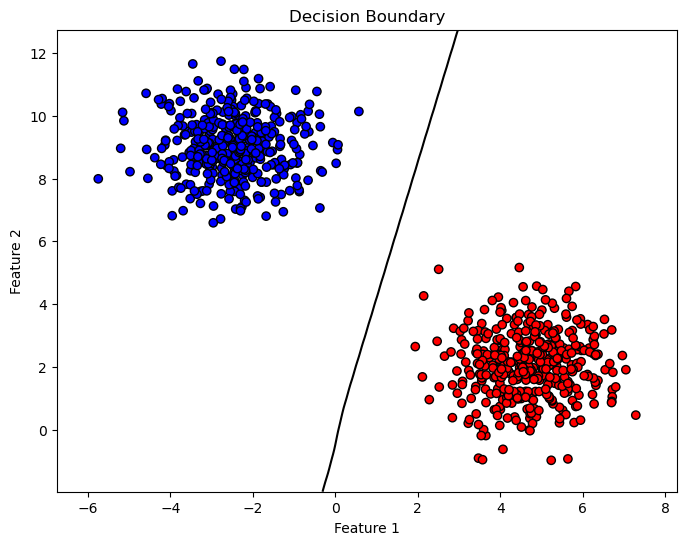

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Define the forward propagation function (same as before)
def forward(X):
    z1 = np.dot(X, w_i_h) + b_h  # Linear combination for hidden layer
    output_h = sigmoid(z1)  # Apply sigmoid activation to hidden layer
    
    z2 = np.dot(output_h, w_h_o) + b_o  # Linear combination for output layer
    output_o = sigmoid(z2)  # Apply sigmoid activation to output layer
    
    return output_o

# Create a grid of points covering the input space
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Create an input matrix of shape (n_samples, 2)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Get predictions for all points in the grid
predictions = forward(grid_points)
predictions = predictions.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contour(xx, yy, predictions, levels=[0, 0.5, 1], colors='black')  # Just the contour lines in black

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), cmap=plt.cm.bwr, edgecolors='k', marker='o')

# Label the plot
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the plot
plt.show()


## Task 2: Multiclass Classification Using TensorFlow (4 Marks)

### Dataset Preparation
* Use the MNIST dataset for this task (refer to TensorFlow documentation for
loading the dataset).
* Split the dataset into train, validation, and test sets.

In [98]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [99]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the data for 0 to 1 value and change 28x28 images to 784 features)
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the data into train, validation, and test sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)


### Model Creation and Training (2 Marks)
* Create a neural network using TensorFlow for multiclass classification. The
model should include:
    * Input layer matching the dataset features.
    * At least two hidden layers with a customizable number of neurons.
    * An output layer with softmax activation (the number of neurons should equal the number of classes).


In [100]:
def create_model(first_layer_no, sec_layer_no, optimizer, regularizer, use_batch_norm, dropout_rate=0.5):
    model = Sequential()

    # Input layer (784 neurons)
    model.add(Dense(128, input_shape=(784,), activation='relu', kernel_regularizer=regularizer))
    if use_batch_norm:
        model.add(BatchNormalization())
    
    # First hidden layer (128 neurons)
    model.add(Dense(first_layer_no, activation='sigmoid', kernel_regularizer=regularizer))
    if use_batch_norm:
        model.add(BatchNormalization())

    # Second hidden layer (64 neurons)
    model.add(Dense(sec_layer_no, activation='sigmoid', kernel_regularizer=regularizer))
    if use_batch_norm:
        model.add(BatchNormalization())
    

    # Output layer (10 neurons for the 10 classes)
    model.add(Dense(10, activation='softmax'))
    
    # Compile the model with the specified optimizer
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Choose regularizer (L1, L2) and optimizer (SGD, Adam, RMSprop)


### Experiment with the following:
* Regularization techniques: L1, L2, and Dropout.
* Optimizers: SGD, Adam, and RMSprop.
* With and without Batch Normalization.

In [103]:
optimizers = [SGD(), Adam(), RMSprop()]
batch_normalization_options = [False, True]
dropout_rates = [None, 0.2]
regularizers = [None, l1(0.01), l2(0.01)]
results=[]

for regularizer in regularizers:
    for optimizer in optimizers:
        for dropout_rate in dropout_rates:
            for batch_norm in batch_normalization_options:
                    # Create a new optimizer instance
                if isinstance(optimizer, SGD):
                    optimizer_instance = SGD()
                elif isinstance(optimizer, Adam):
                    optimizer_instance = Adam()
                elif isinstance(optimizer, RMSprop):
                    optimizer_instance = RMSprop()
                model = create_model(first_layer_no, sec_layer_no, optimizer=optimizer_instance, regularizer=regularizer, use_batch_norm=batch_norm, dropout_rate=0.5)
                    
                    # Train the model
                history = model.fit(x_train, y_train, epochs=2, batch_size=64, validation_data=(x_val, y_val))

                test_loss, test_acc = model.evaluate(x_test, y_test)
                results.append({
                'optimizer': regularizer.__class__.__name__,
                'optimizer': optimizer.__class__.__name__,
                'batch_norm': batch_norm,
                'dropout_rate': dropout_rate,
                'test_loss': test_loss,
                'test_acc': test_acc
                })
            
                print(f"Test accuracy with regularizer: {regularizer.__class__.__name__} , optimizer: {optimizer.__class__.__name__}, "
                  f"batch normalization: {batch_norm}, dropout rate: {dropout_rate} => Test Accuracy: {test_acc:.4f}")



Epoch 1/2
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1272 - loss: 2.3780 - val_accuracy: 0.2055 - val_loss: 2.2511
Epoch 2/2
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2990 - loss: 2.2305 - val_accuracy: 0.4339 - val_loss: 2.1404
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4241 - loss: 2.1467
Test accuracy with regularizer: NoneType , optimizer: SGD, batch normalization: False, dropout rate: None => Test Accuracy: 0.4368
Epoch 1/2
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7551 - loss: 0.8391 - val_accuracy: 0.9224 - val_loss: 0.2823
Epoch 2/2
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9271 - loss: 0.2685 - val_accuracy: 0.9416 - val_loss: 0.2095
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9348 - loss: 0.2262
Test accuracy with regularizer: NoneType , optimizer: SGD, batch normalization: True, dropout rate: None => Test Accuracy: 0.9449
Epoch 1/2
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1228 - loss: 2.3

### 2)Model Evaluation and Hyperparameter Optimization (2 Mark)
* Train the model and evaluate it on the test set using accuracy, loss, and a
confusion matrix.
* Identify the optimal combination of:
    * Regularization technique.
    * Optimizer.
    * Batch Normalization usage.
* Justify your findings based on the results obtained.

In [ ]:
# Identify the best combination based on test accuracy
best_result = max(results, key=lambda x: x['test_acc'])
print("Best Configuration:")
print(best_result)

# Confusion Matrix of the Best Model
best_optimizer = best_result['optimizer']
best_batch_norm = best_result['batch_norm']
best_dropout_rate = best_result['dropout_rate']


In [ ]:
# Create the best model
best_model = create_model(first_layer_no, sec_layer_no, optimizer=globals()[best_optimizer](), 
                          regularizer=regularizer, use_batch_norm=best_batch_norm, dropout_rate=best_dropout_rate)
best_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_val, y_val))
y_pred = best_model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute and plot confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [60]:
y_pred = model.predict(x_test)
y_pred_labels=[np.argmax(i) for i in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [32]:

from sklearn.metrics import confusion_matrix
import seaborn as sn


<AxesSubplot:>

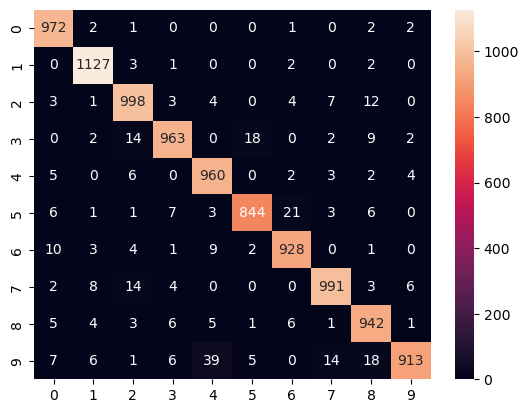

In [34]:
if y_test.ndim > 1:
    y_test = np.argmax(y_test, axis=1)
confusion_matrix=tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
sn.heatmap(confusion_matrix,annot=True,fmt='d')